In [29]:
import uproot as ur
import matplotlib as plt
import numpy as np
import seaborn as sns

In [68]:
df = ur.open("output/zhh_PreSelection.root")["eventTree"]

In [69]:
df.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | int32_t                  | AsDtype('>i4')
event                | int32_t                  | AsDtype('>i4')
nJets                | int32_t                  | AsDtype('>i4')
nIsoLeptons          | int32_t                  | AsDtype('>i4')
missingPT            | float                    | AsDtype('>f4')
Evis                 | float                    | AsDtype('>f4')
thrust               | float                    | AsDtype('>f4')
dileptonMass         | float                    | AsDtype('>f4')
dileptonMassDiff     | float                    | AsDtype('>f4')
dijetMass            | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
dijetMassDiff        | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
dihiggsMass          | float                    | AsDtype('>f4')
nbjets               | int

In [70]:
col = df['process']

In [71]:
col.array()

<Array ['qqhh', 'qqhh', 'qqhh', ..., 'qqhh', 'qqhh', 'qqhh'] type='99 * string'>

In [37]:
vec = np.array(df['preselsPassedVec'].array())
vec

array([[1, 0, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [1, 0, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1]], dtype=int32)

In [27]:
consec = df['preselsPassedConsec'].array()

In [28]:
consec

<Array [1, 1, 1, 1, 1, 1, 4, 1, ..., 1, 1, 1, 1, 1, 1, 1] type='12023 * int32'>

<Axes: ylabel='Count'>

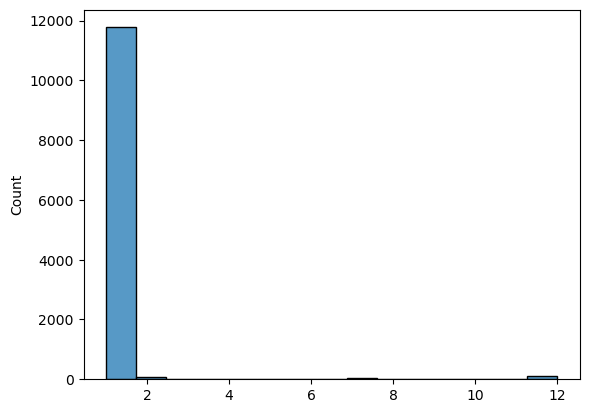

In [30]:
sns.histplot(consec)

In [48]:
len(vec.T)

12

In [54]:
bars = list(range(len(vec.T) + 1))
vals = [len(vec)]

temp = np.ones(len(vec), dtype=int)
for i in range(len(vec.T)):
    temp = temp & vec.T[i]
    vals.append(np.sum(temp))
    
del temp

In [55]:
bars, vals

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [12023, 12023, 249, 164, 162, 150, 150, 143, 109, 109, 109, 109, 109])

/tmp/ipykernel_418773/3617261500.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(desc, rotation=45)


[Text(0, 0, 'All'),
 Text(1, 0, 'nJets'),
 Text(2, 0, 'nIsoLeps'),
 Text(3, 0, 'DiLepMDif'),
 Text(4, 0, 'DiJetMDif1'),
 Text(5, 0, 'DiJetMWdw1'),
 Text(6, 0, 'DiJetMDif2'),
 Text(7, 0, 'DiJetMWdw2'),
 Text(8, 0, 'MissPTWdw'),
 Text(9, 0, 'Thrust'),
 Text(10, 0, 'Evis'),
 Text(11, 0, 'MinHHMass'),
 Text(12, 0, 'nBJets')]

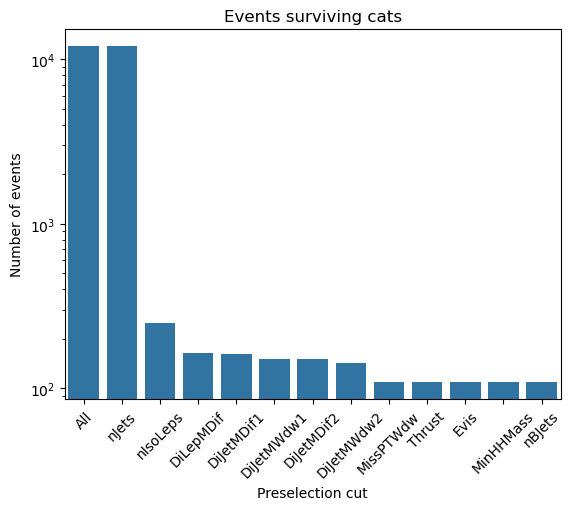

In [86]:
ax = sns.barplot(x=bars, y=vals, )
ax.set_yscale('log')
ax.set_ylabel('Number of events')
ax.set_xlabel('Preselection cut')
ax.set_title('Events surviving cats')

desc = [
    'All',
    'nJets',
    'nIsoLeps',
    'DiLepMDif',
    
    'DiJetMDif1',
    'DiJetMWdw1',
    'DiJetMDif2',
    'DiJetMWdw2',
    
    'MissPTWdw',
    'Thrust',
    'Evis',
    'MinHHMass',
    'nBJets',
]
ax.set_xticklabels(desc, rotation=45)